In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()

In [8]:
X,y=iris['data'],iris['target']
X=StandardScaler().fit_transform(X)

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)#loss function kmean

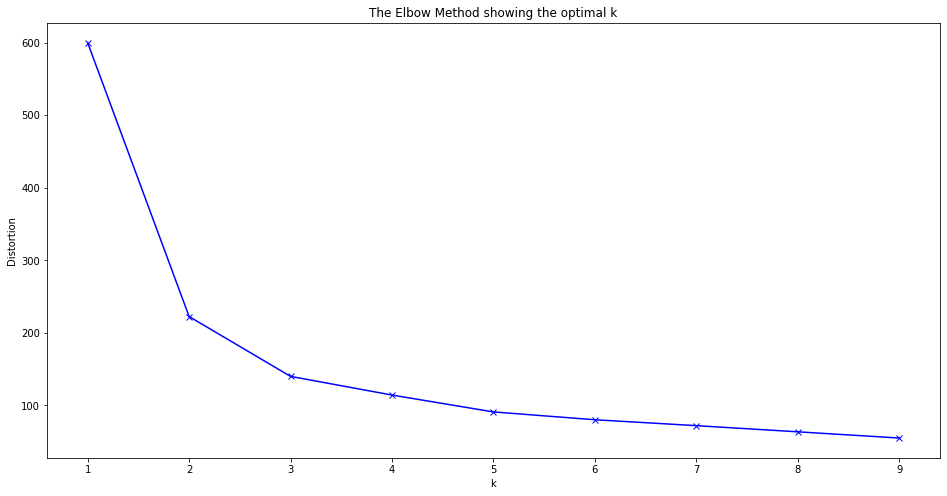

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
silhouettes=[]
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    silhouettes.append(silhouette_score(X,kmeanModel.predict(X)))

In [12]:
silhouettes

[0.5817500491982808,
 0.45994823920518635,
 0.3882200962165986,
 0.3413927532719825,
 0.3265618959264091,
 0.3278139526317131,
 0.33370899556046807,
 0.3375448015756917]

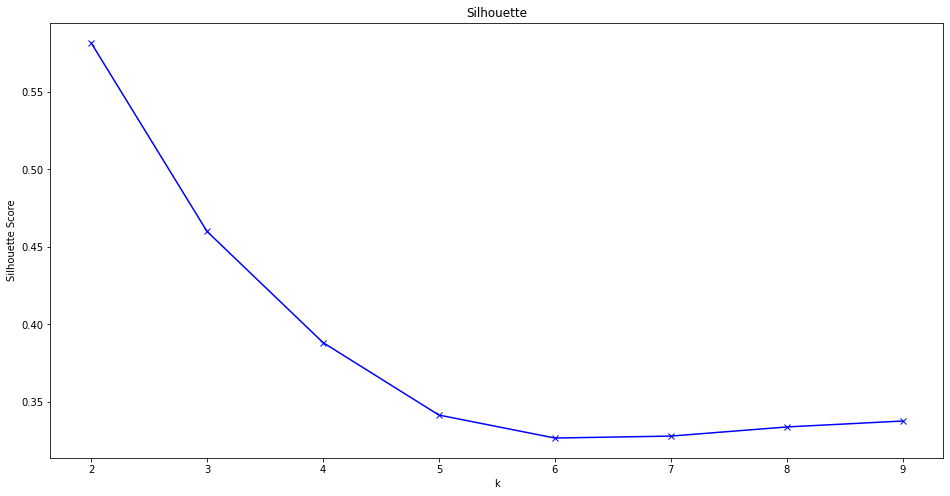

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z=pca.fit_transform(X)

Text(0.5, 1.0, 'Target')

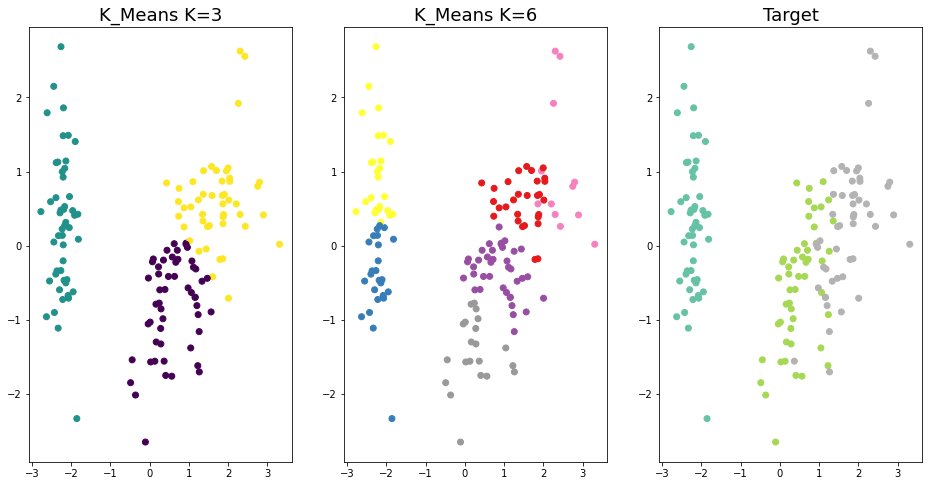

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
km0=KMeans(n_clusters=3).fit(X)
km1=KMeans(n_clusters=6).fit(X)
axes[0].scatter(Z[:,0], Z[:,1], c=km0.predict(X))
axes[1].scatter(Z[:,0], Z[:,1], c=km1.predict(X), cmap=plt.cm.Set1)
axes[2].scatter(Z[:,0], Z[:,1], c=y, cmap=plt.cm.Set2)
axes[0].set_title('K_Means K=3', fontsize=18)
axes[1].set_title('K_Means K=6', fontsize=18)
axes[2].set_title('Target', fontsize=18)

In [16]:
#Measurements with TrueLabels
#https://www.aclweb.org/anthology/D07-1043.pdf

from sklearn.metrics.cluster import homogeneity_completeness_v_measure
km0=KMeans(n_clusters=3).fit(X)
print('k=3',homogeneity_completeness_v_measure(y,km0.predict(X)))
km1=KMeans(n_clusters=6).fit(X)
print('k=6',homogeneity_completeness_v_measure(y,km1.predict(X)))



k=3 (0.6591265018049008, 0.6598476779627759, 0.659486892724918)
k=6 (0.6724443226881679, 0.43323256266222343, 0.5269618656693481)


In [17]:
#Estimate DBSCAN parameters without truelabels

#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd